# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



algoritma K-means Clustering , bekerja dengan memulai data dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid.

Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










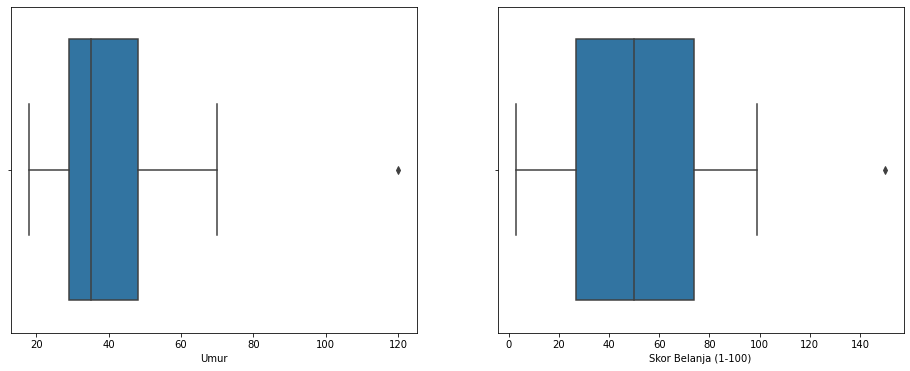

In [2]:
#code here
import matplotlib.pyplot as plt
import seaborn as sns
df.fillna(method='ffill', inplace=True)

fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.boxplot(x='Umur', data=df, ax=ax[0])
sns.boxplot(x='Skor Belanja (1-100)', data=df, ax=ax[1])
plt.show()

In [3]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final
print(finding_outlier(df['Umur']))
print(finding_outlier(df['Skor Belanja (1-100)']))

249    120.0
Name: Umur, dtype: float64
16    150.0
Name: Skor Belanja (1-100), dtype: float64


In [4]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df_final

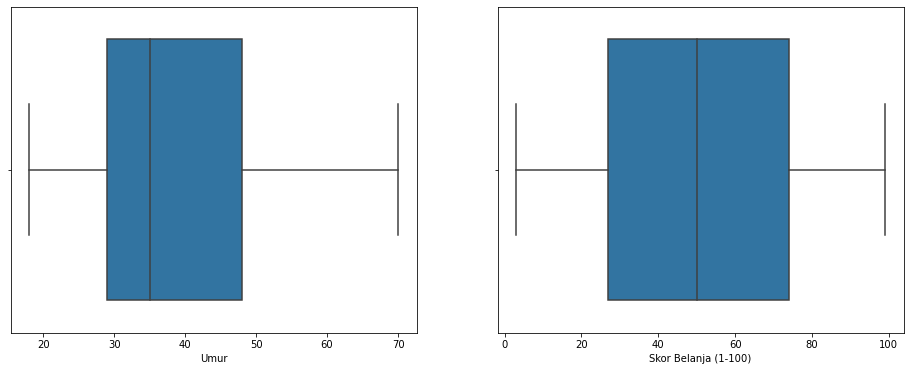

In [5]:
df2 = remove_outlier(df[['Umur', 'Skor Belanja (1-100)']])

fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.boxplot(x='Umur', data=df2, ax=ax[0])
sns.boxplot(x='Skor Belanja (1-100)', data=df2, ax=ax[1])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2.astype(float))

In [7]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

In [8]:
new_df = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df['label1_kmeans'] = labels1

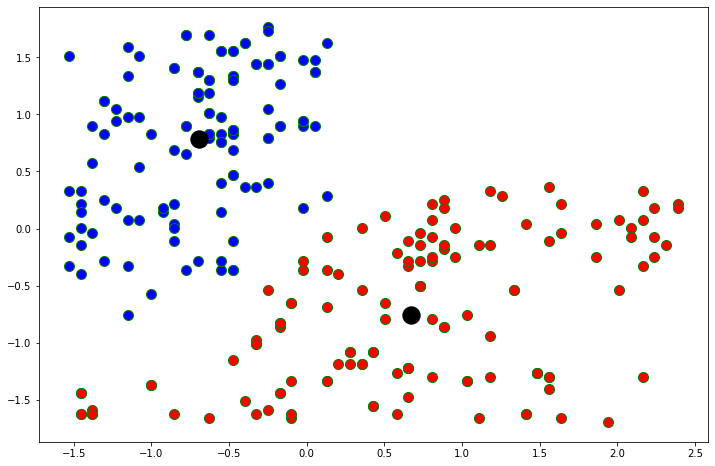

In [9]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label1_kmeans==0], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label1_kmeans==1], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


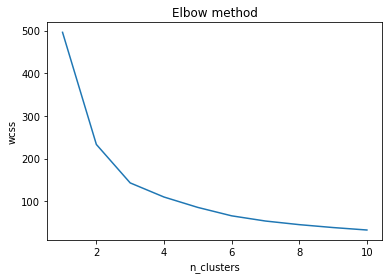

In [16]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [11]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
new_df['label2_kmeans'] = labels2

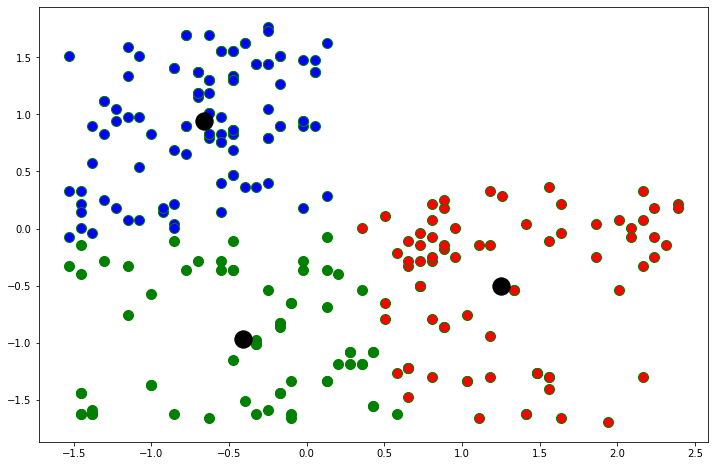

In [12]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label2_kmeans==0], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans==0], c='green', s=100, edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans==1], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans==1], c='red', s=100, edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans==2], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans==2], c='blue', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)

plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini: <br>
Dengan menggunakan elbow method, dapat dilihat bahwa nilai inertia perlahan menurun pada angka 3, sehingga jumlah cluster yang dipakai adalah 3 cluster. Dengan menggunakan K-Means segmentasi pelanggan supermarket dibagi menjadi 3 cluster yaitu:
- Umur muda, skor belanja low-mid (green)
- Umur muda, skor belanja mid-high (blue)
- Umur tua, skor belanja low-mid (red)